In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [45]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [46]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [47]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [48]:
# Save references to each table
station = Base.classes.station
measurement=Base.classes.measurement

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
recent_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)


('2017-08-23',)


In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

[('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09

In [54]:
# Calculate the date one year from the last date in data set.
from datetime import datetime, timedelta

#Converting into string
most_recent_date = datetime.strptime('2017-08-23', '%Y-%m-%d')

#Calculating one year
one_year_ago = most_recent_date - timedelta(days=365)

print(f"{one_year_ago.date()}") 

results = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= one_year_ago.date())\
    .order_by(measurement.date)\
    .all()

2016-08-23


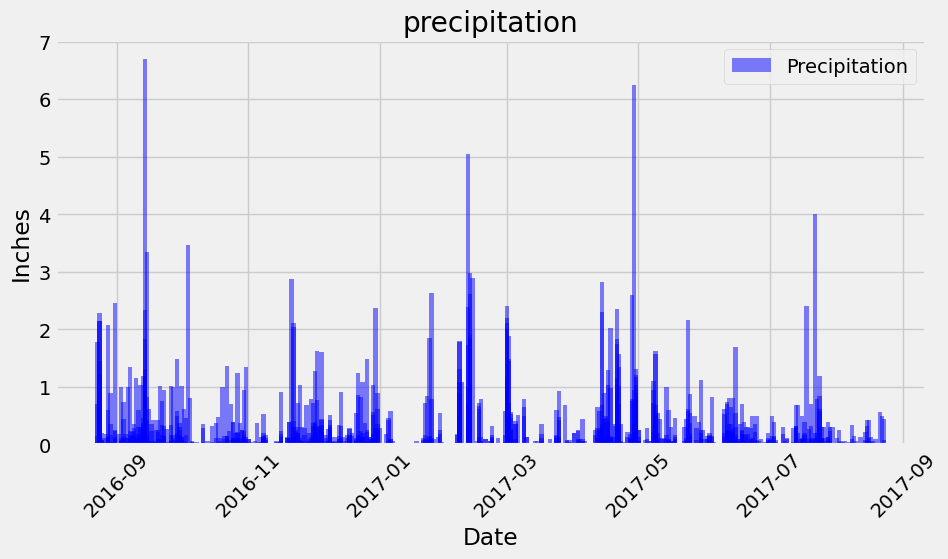

In [58]:

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago.strftime('%Y-%m-%d')).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
precip_df['Date'] = pd.to_datetime(precip_df['Date'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))
plt.bar(precip_df['Date'], precip_df['Precipitation'], width=2, color='b', alpha=0.5, label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("precipitation")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.drop(columns=['Date']).describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

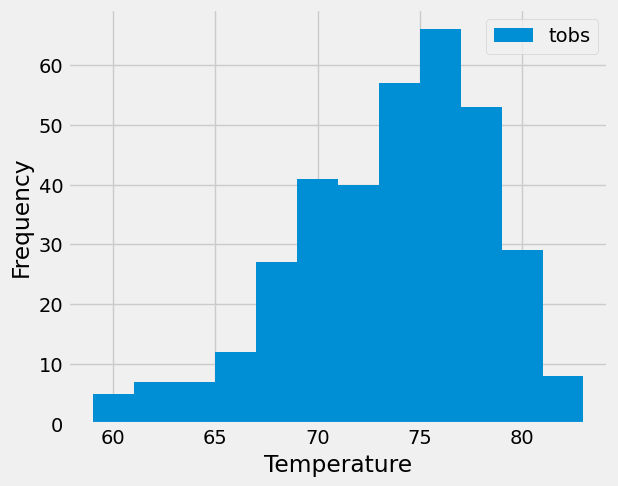

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()